# Grafy a prokládání dat v pythonu

Více informací a úvod k jazyku Python lze najít na stránkách předmětu [Vědecké programování v Pythonu](https://pythonic.eu/fjfi/)

## Načtení knihoven (modulů):

In [1]:
# "#" v kódu označují komentáře
# načtení knihovny a přiřazení zkratky
import numpy as np #numerická knmihovna
import matplotlib.pyplot as plt # knihovna pro tvorbu grafů
# načtení konkrétní funkce/objektu z knihovny
from scipy.optimize import curve_fit # fitování křivkou

/compass/home/svoboda/.local/lib/python3.7/site-packages/scipy/__init__.py:137: UserWarning: NumPy 1.16.5 or above is required for this version of SciPy (detected version 1.16.2)
  UserWarning)


### Dokumentace
 - [numpy](https://docs.scipy.org/doc/numpy/reference/index.html)
 - [matplotlib](https://matplotlib.org/contents.html)
 - [scipy](https://docs.scipy.org/doc/scipy/reference/)
 - [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)


## Načtení dat
 - Pro načítání dat je využita knihovna numpy.
 - Cestu k souboru lze uvést přímo pomocí textového řetezce

In [2]:
# načtení dat z `prvni.txt` oddělených tabulátorem s použitím prvního řádku jako klíčů ve slovníku data
data = np.genfromtxt( 'data/prvni.txt', delimiter="\t", names=True)
# 
print('x1 =', data['x1'])
print('t =', data['t'])

x1 = [ 9.17 10.49 12.54 14.82 17.59 20.98 23.33 26.51 27.64 28.38 29.56 28.79
 29.32 27.06 23.7  21.21 20.09 15.83 13.32 11.45 10.86 10.91  9.75 11.46
 13.01 16.16 19.04 22.04 23.2  25.32 28.39 28.98 29.11 29.81 26.99 26.92
 24.07 21.45 19.28 16.6  13.55 11.42 11.81 10.61 10.87 12.44 14.02 17.6
 20.05 22.24 24.52 26.46 28.06 27.92 29.27 28.63 26.59 25.45 22.87 20.56
 16.99 15.52 12.73 11.74 11.61 10.9  12.88 14.34 15.23 17.13 20.24 22.34
 24.84 26.47 28.28 28.06 28.69 28.19 25.52 24.89 21.36 19.72 16.69 14.85
 13.36 13.01 11.16 12.6  12.31 13.19 15.85 18.   20.22 23.88 24.6  26.53
 27.04 28.57 28.45 26.16]
t = [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270.
 280. 290. 300. 310. 320. 330. 340. 350. 360. 370. 380. 390. 400. 410.
 420. 430. 440. 450. 460. 470. 480. 490. 500. 510. 520. 530. 540. 550.
 560. 570. 580. 590. 600. 610. 620. 630. 640. 650. 660. 670. 680. 690.
 700. 710. 720. 730. 740. 7

## Vykreslení grafu

Jednoduche vykrelseni bodů

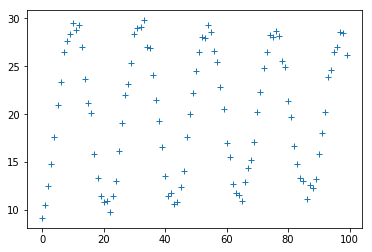

In [3]:
plt.plot(data['x1'], '+')

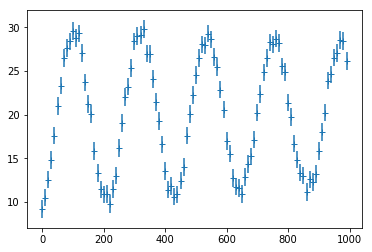

In [4]:
plt.errorbar(data['t'], data['x1'], yerr=1, fmt='+')
plt.show()

## Prokládání křivkou
Budeme uvažovat tlumené kmity, jejichž časovou závislost amplitudy lze vyjádřit následujícím vzorcem
$$ a(t) = A e^{-\delta t} \sin(\frac{2 \pi} { T} t + \varphi) + S \mathrm{,} $$
kde $A$ je amplituda, $\delta$ tlumící faktor, $T$ perioda, $\varphi$ fázový posun počáteční polohy a $S$ vertikální posun kmitů.

### Definice funkce k proložení dat
Nyní zapíšeme časovou závislost amplitudy tlumených kmitů do pythonu

In [5]:
def damped_pendulum(t, A, delta, T, phi, S):
    """
    Toto je dokumentace funkce. Zde je možné funkci (stručně) popsat, uvést příklady použití atd.
    Není potřeba pro chod programu, ale psát dokumentaci je součastí dobrých programátorských navyků
    obzvláště u delších programů.
    
    t - čas, A - amplituda, delta - koeficient útlumu, T - perioda, phi - fázový posun, S - vertikální posun
    """
    return A * np.exp(-delta*t) * np.sin(2*np.pi/T*t + phi) + S

In [6]:
# zobrazení nápovědy
help(damped_pendulum)

Help on function damped_pendulum in module __main__:

damped_pendulum(t, A, delta, T, phi, S)
    Toto je dokumentace funkce. Zde je možné funkci (stručně) popsat, uvést příklady použití atd.
    Není potřeba pro chod programu, ale psát dokumentaci je součastí dobrých programátorských navyků
    obzvláště u delších programů.
    
    t - čas, A - amplituda, delta - koeficient útlumu, T - perioda, phi - fázový posun, S - vertikální posun



### Výpočet parametrů
Bude využita funkce curve_fit z knihovny scipy

In [7]:
p0 = [10, 2e-04, 200, 30, 120] # počáteční odhad parametrů
errorbars = np.ones_like(data['t']) * 0.5 # odhad systematické chyby měření amplitudy jako polovina nejmenšího dílu měřidla
# funkce np.ones_like vytvoří pole jedniček o stejných rozměrech jako má pole na vstupu funkce
# následuje vlastní provedení fitu
popt, pcov = curve_fit(damped_pendulum, # prokládaná funkce
                         data["t"], # hodnoty nezávisle proměné
                         data["x1"], # příslusné hodnoty závisle proměné
                         sigma=errorbars, # chyby s jakou byly určeny hodnoty závisle proměnné
                         p0=p0, # počáteční odhad parametrů prokládané funkce
                        )
# popt = parameters optimum, pcov = patameters covariance

In [8]:
#výpočet chyb parametrů z covariance
sig = np.sqrt(np.diag(pcov))
print(sig)

[1.67556860e-01 2.99170806e-05 2.35613043e-01 1.66455716e-02
 5.69615582e-02]


In [9]:
# stará konvece vkládní hodnot do řetězce znaků
print('fit 1: A=%5.3f, delta=%5.3e, T=%5.3f, phi=%5.3f, S=%5.3f' % tuple(popt))
print('error 1: A=%5.3f, delta=%5.3e, T=%5.3f, phi=%5.3f, S=%5.3f' % tuple(sig))
print() # prázdný řádek

# nová konvence
print('fit 1: A={:5.3f}, delta={:5.3e}, T={:5.3f}, phi={:5.3f}, S={:5.3f}'.format(*popt))
print('error 1: A={:5.3f}, delta={:5.3e}, T={:5.3f}, phi={:5.3f}, S={:5.3f}'.format(*sig))

fit 1: A=10.231, delta=2.377e-04, T=217.236, phi=30.026, S=19.957
error 1: A=0.168, delta=2.992e-05, T=0.236, phi=0.017, S=0.057

fit 1: A=10.231, delta=2.377e-04, T=217.236, phi=30.026, S=19.957
error 1: A=0.168, delta=2.992e-05, T=0.236, phi=0.017, S=0.057


### Popisek proložené funkce do legendy

In [10]:
# print celého pole najednou
print(popt)

[1.02314972e+01 2.37652863e-04 2.17236447e+02 3.00255931e+01
 1.99568017e+01]


In [11]:
# * předá prvnky pole jednotlivě
print(*popt)
for i in popt:  # iteruje pres vsechny prvky popt
    print(i, end=' ')

10.231497157954372 0.0002376528634601706 217.23644720657808 30.025593089851622 19.956801704718636
10.231497157954372 0.0002376528634601706 217.23644720657808 30.025593089851622 19.956801704718636 

In [12]:
# `r` před první uvozovkou vypne používání speciálných znaků jako např. \t pro tabulátor...
print('{ \n }', r'{ \n }', '{ \t }', r'{ \t }')

{ 
 } { \n } { 	 } { \t }


In [16]:
#zaokrouhleni podle exponentu ze sig
fit = r'${:.1f} e^{{ -{:.6f} \tau}} \sin( [2\pi/ {:.1f}] \tau + {:.3f}) + {:.2f} $'.format(*popt)
print(fit)

$10.2 e^{ -0.000238 \tau} \sin( [2\pi/ 217.2] \tau + 30.026) + 19.96 $


### Vygenerovani dat pro vykresleni fitu

In [14]:
fit_cas = np.arange(data["t"][0],data["t"][-1],0.01) # sada hodnot času, ve kterých bude vykreslena proložená funkce
fit_hodnoty = damped_pendulum(fit_cas, *popt)

### Zobrazení s errorbary a vykreslení proložené funkce

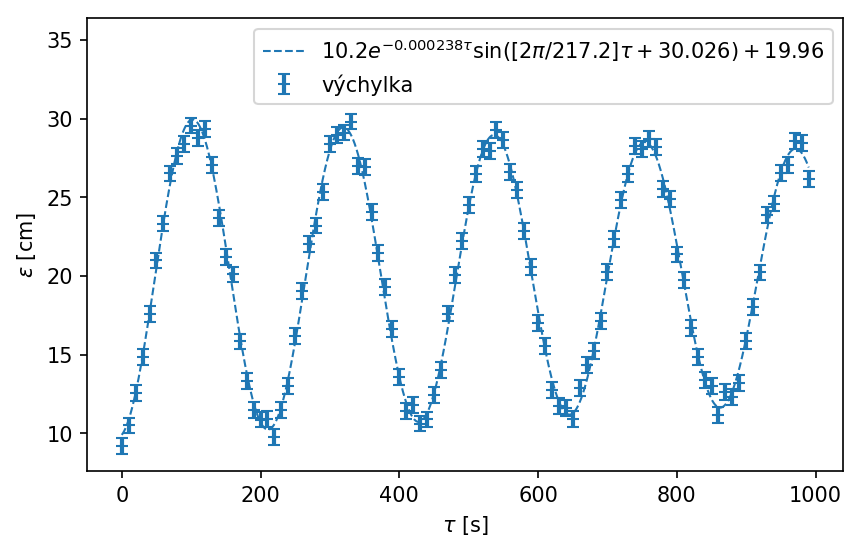

In [17]:
fs = 10 # velikost popisků, měla by být stejná jako velikost textu v protokolu
# šířka papíru formátu a4 je 8.27 palce
plt.figure(figsize=(6.5,4), dpi=150) # nový obrázek, figsize = velikost v palcích (šířka, výška)

# změna velikosti popisu os
plt.tick_params(axis='both', # obou os
                which='major', # hlavní mříž (vedlejší není použita)
                labelsize=fs) # velikost nastavena na hodnotu proměnné fs

plt.errorbar(data["t"], # x data
             data["x1"], # y data
             yerr=errorbars, # velikosti chyb
             ls="", # typ spojnice bodů errorbarů - nikdy nepoužívat!!! vždy vypnout prázdným stringem "", nebo ''
             marker = "+", # druh značky např. '.' 'x' '+'
             color="C0", # barva, kod C0-C9 jsou barvy standardní sady používané pyplotem
             capsize=3, # šířka ukončení errorbaru
             elinewidth=2, # šířka 
             label='výchylka', # popisek pro legendu
            )

plt.plot(fit_cas, fit_hodnoty,
         color="C0",  # barva
         ls='--',  # styl čáry - čárkovaná
         label=fit,  # popisek proložené funkce
         lw = 1,  # sirka cary
        )
plt.xlabel(r'$\tau$ [s]', fontsize=fs)
plt.ylabel(r'$\varepsilon$ [cm]', fontsize=fs)
plt.legend(fontsize=fs)
ylim = plt.ylim()  # získání rozsahu y osy
plt.ylim(ylim[0], ylim[1] + 5)  # zvětšení horní hranice o 5
#plt.Axes.set_aspect('equal') # stejna velikost dilku na obou osach
#plt.savefig('figs/prvni.png', dpi=200) # ulozeni obrazku
plt.show() # vykresli graf